<a href="https://colab.research.google.com/github/will-hill/Yelp_NLP/blob/master/3.Basic_Keras_DL_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Keras Deep Learning NLP
inspired from 
* https://www.kaggle.com/ngyptr/lstm-sentiment-analysis-keras
* https://medium.com/datadriveninvestor/building-neural-network-using-keras-for-regression-ceee5a9eadff


### Will Setup Code
I created a couple subdirectories in my Google Drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
!ls -l /content/data/colab/yelp_nlp/review.json

-rw------- 1 root root 5347475638 Aug  4 01:21 /content/data/colab/yelp_nlp/review.json


In [14]:
REVIEWS_TO_INGEST = 1000
data_list = list()
columns = ['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date']

# inspired by https://thedatafrog.com/text-mining-pandas-yelp/
with open('/content/data/colab/yelp_nlp/review.json') as reviews:
    import json
    for i, line in enumerate(reviews):

        if i == REVIEWS_TO_INGEST:
            break

            # convert json line to di t
        data = json.loads(line)
        data_list.append([data['review_id'],
                          data['user_id'],
                          data['business_id'],
                          data['stars'],
                          data['useful'],
                          data['funny'],
                          data['cool'],
                          data['text'],
                          data['date']])

reviews.close()
del reviews, i, line, data, REVIEWS_TO_INGEST, json
###
import pandas
df = pandas.DataFrame(data_list, columns=columns)
del data_list, columns, pandas

%who

Tokenizer	 df	 drive	 hd5_path	 keras	 pad_sequences	 pd	 student	 train_test_split	 



### Joanna Setup Code

In [2]:
from google.colab import drive #python code
drive.mount('/content/drive') # python code <- follow the resulting directions
!ln -s drive/My\ Drive data # bash command
!ls # you should "see" drive directory now.
hd5_path='data/reviews.h5'
#!pip install numpy==1.15.4

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
data  drive  sample_data


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from sys import platform
if platform == "darwin":
    import plaidml.keras
    plaidml.keras.install_backend()
else:
    import keras
del platform
%who

Using TensorFlow backend.


drive	 hd5_path	 keras	 student	 


## Regression: Number of Stars

In [6]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


df = pd.read_hdf(hd5_path)
display(df.head(3))
display(df.describe())
display(df.info())
max_features=100
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['text'].values)
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X)

# Normalize Y to be between 0 and 1
Y = df.stars / max(df.stars)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

###

del pd, Tokenizer, pad_sequences, tokenizer, train_test_split, df
%who

FileNotFoundError: ignored

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

embed_dim = 12#8
lstm_out = 19#6

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length = X.shape[1]))
#model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 510, 12)           1200      
_________________________________________________________________
lstm_2 (LSTM)                (None, 19)                2432      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 20        
Total params: 3,652
Trainable params: 3,652
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
batch_size = 128
epochs = 40
model.fit(X_train, Y_train, epochs = epochs, batch_size=batch_size, verbose = 1)

Epoch 1/40
670/670 [==============================] - 6s 9ms/step - loss: 0.6059 - mean_absolute_error: 0.7213 - acc: 0.0000e+00
Epoch 2/40
670/670 [==============================] - 5s 7ms/step - loss: 0.5434 - mean_absolute_error: 0.6770 - acc: 0.0000e+00
Epoch 3/40
670/670 [==============================] - 5s 7ms/step - loss: 0.4672 - mean_absolute_error: 0.6181 - acc: 0.0000e+00
Epoch 4/40
670/670 [==============================] - 5s 7ms/step - loss: 0.3669 - mean_absolute_error: 0.5346 - acc: 0.0000e+00
Epoch 5/40
670/670 [==============================] - 5s 7ms/step - loss: 0.2442 - mean_absolute_error: 0.4367 - acc: 0.0015
Epoch 6/40
670/670 [==============================] - 5s 7ms/step - loss: 0.1213 - mean_absolute_error: 0.3081 - acc: 0.3045
Epoch 7/40
670/670 [==============================] - 5s 7ms/step - loss: 0.1288 - mean_absolute_error: 0.2788 - acc: 0.4104
Epoch 8/40
670/670 [==============================] - 5s 7ms/step - loss: 0.0961 - mean_absolute_error: 0.258

In [0]:
loss, mae, acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)

In [0]:
print(loss) #mse
print(mae)
print(acc)

0.07139029947645736
0.21283352095069308
0.3999999963875973


In [0]:
y_pred= model.predict(X_test)

In [0]:
y_pred[0:5]

array([[0.5443308],
       [0.7830462],
       [0.8388883],
       [0.7754902],
       [0.8813996]], dtype=float32)

In [0]:
Y_test[0:5]

521    0.6
737    1.0
740    1.0
660    0.6
411    1.0
Name: stars, dtype: float64

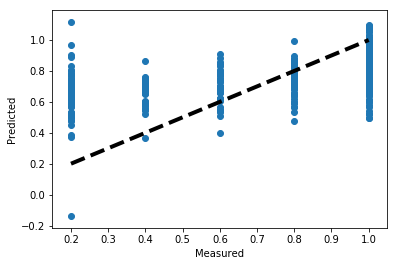

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(Y_test, y_pred)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()